Create the machine learning model for wine dataset. You can use regression model to predict the wine quality and then apply rule if wine quality is greater than 7 its good wine else bad wine. And then create a flask web application.


In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
dfn=pd.read_csv(r"C:\Users\Admin\Desktop\gir prj\winequality\winequality-red - winequality-red.csv")
dfn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:

def qua(x):
    if x>=6:
        return 1
    else:
        return 0

    

In [20]:
dfn["newqua"]=dfn["quality"].apply(qua)

In [21]:
dfn["newqua"].value_counts()

1    855
0    744
Name: newqua, dtype: int64

In [22]:
dfn=dfn.drop(columns="quality")

In [23]:
dfn.drop_duplicates(inplace=True)

In [24]:
dfn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,newqua
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [25]:
dfn.sort_values("newqua",ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,newqua
1598,6.0,0.31,0.47,3.60,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1
1223,10.5,0.36,0.47,2.20,0.074,9.0,23.0,0.99638,3.23,0.76,12.0,1
674,10.8,0.40,0.41,2.20,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,1
1242,9.0,0.40,0.41,2.00,0.058,15.0,40.0,0.99414,3.22,0.60,12.2,1
681,8.0,0.45,0.23,2.20,0.094,16.0,29.0,0.99620,3.21,0.49,10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
679,10.8,0.26,0.45,3.30,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,0
680,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0
683,8.1,0.78,0.23,2.60,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0


In [26]:
dfn["newqua"].value_counts()

1    719
0    640
Name: newqua, dtype: int64

In [27]:
x1=dfn.drop(columns="newqua")
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
y1=dfn["newqua"]
y1

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: newqua, Length: 1359, dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.20,random_state=15,stratify=dfn["newqua"])
LG1=LogisticRegression()
LG1.fit(X_train,Y_train)
Y_pred=LG1.predict(X_test)
print(metrics.accuracy_score(Y_pred,Y_test))
print(metrics.classification_report(Y_test,Y_pred))
metrics.confusion_matrix(Y_test,Y_pred)

0.7573529411764706
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       128
           1       0.79      0.74      0.76       144

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 99,  29],
       [ 37, 107]], dtype=int64)

In [30]:
for j in np.arange(0,1,0.1):
    y_pred_prob=LG1.predict_proba(X_test)
    y_pred_prob_one=y_pred_prob[:,1]
    for i in range(0,len(y_pred_prob_one)):
        if (y_pred_prob_one[i]>=j):
            y_pred_prob_one[i]=1
        else:
            y_pred_prob_one[i]=0
    print("Threshold",j)
    print("Classification report: \n",metrics.classification_report(Y_test,y_pred_prob_one))
    print("AUC score",metrics.roc_auc_score(Y_test,y_pred_prob_one))
    print()
        

Threshold 0.0
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.53      1.00      0.69       144

    accuracy                           0.53       272
   macro avg       0.26      0.50      0.35       272
weighted avg       0.28      0.53      0.37       272

AUC score 0.5

Threshold 0.1
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.02      0.05       128
           1       0.54      1.00      0.70       144

    accuracy                           0.54       272
   macro avg       0.77      0.51      0.37       272
weighted avg       0.75      0.54      0.39       272

AUC score 0.51171875

Threshold 0.2
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.23      0.38       128
           1       0.59      0.99      0.74       144

    accuracy                

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


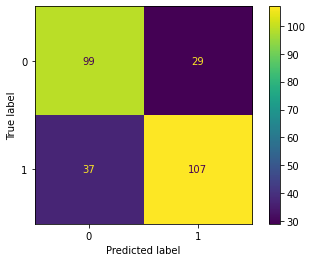

In [31]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test,Y_pred))
disp.plot()                                                                        
plt.show()

In [32]:
import pickle
pickle.dump(LG1,open("wine.pkl","wb"))

In [263]:
LG1.predict(np.array([[7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
#5.6	0.850	0.05	1.40	0.045	12.0	88.0	0.99240	3.56	0.82	12.900000

In [ ]:
#6.5	0.880	0.03	5.60	0.079	23.0	47.0	0.99572	3.58	0.50	11.200000

In [264]:
LG1.predict(np.array([[6.5,0.880,0.03,5.60,0.079,23.0,47.0,0.99572,3.58,0.50,11.200000]]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [35]:
LG1.predict(np.array([[5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.900000]]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [262]:
LG1.predict(np.array([[7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.800000]]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [266]:
LG1.predict(np.array([[10.5,0.360,0.47,2.20,0.074,9.0,23.0,0.99638,3.23,0.76,12.000000]]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)